## CNN Example

For this example we are taking a look at the MNIST dataset, which is used often in ML tutorials and is a large database of handwritten digits.

Documentation: https://keras.io/api/datasets/mnist/

First, we load the libraries and dataset.

In [1]:
#import libraries
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

#load mnist dataset
#split into train/test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

2023-05-25 11:27:12.740708: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Exercise 1: Print the raw data from the first image from the training dataset. Can you tell what it is? What do the numbers represent? Now use matplotlib to print the first 6 images from this training dataset.

In [2]:
X_train.shape

(60000, 28, 28)

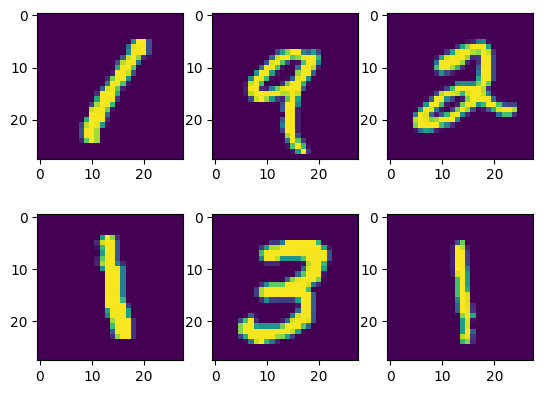

In [3]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

for i in range(3,9):
    plt.subplot(2,3,i-2)
    plt.imshow(X_train[i])



Exercise 2:The CNN will only take a 4D tensor. Replace the pseudocode with the correct numbers into the reshaping commands. See documentation for Conv2D at https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D
What do these new arrays represent?

In [4]:
#Hint: reshaping
X_train = X_train.reshape((60000,28,28,1))
X_train[1]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

Exercise 3: These images are in grayscale. Each number value corresponds to a color between white and black. Normalise the image with reference to black (value:255). How does this change the images?

In [6]:
#scaling

print('X_train shape:', X_train.shape) #X_train shape: (60000, 28, 28, 1)


X_train = X_train/255

        


X_train shape: (60000, 28, 28, 1)


Next, we encode the outcome variables into categories

In [7]:
#set number of categories
num_category = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)

Specify the model structure.

In [8]:
#model 1
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(num_category, activation='softmax'))

2023-05-25 11:29:07.050593: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Next, compile and fit the model. Training time may take several minutes to days depending on the largeness of the data.

In [9]:
#compile model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
#fit the model
batch_size = 128
num_epoch = 10
model_log = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0044 - accuracy: 0.9991 - val_loss: 20.0348 - val_accuracy: 0.9796
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0037 - accuracy: 0.9990 - val_loss: 21.8567 - val_accuracy: 0.9785
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 22.1040 - val_accuracy: 0.9788
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 24.2889 - val_accuracy: 0.9788
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 9.1858e-04 - accuracy: 0.9998 - val_loss: 22.5626 - val_accuracy: 0.9821
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 7.3758e-04 - accuracy: 0.9998 - val_loss: 28.6673 - val_accuracy: 0.9777
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 3.0526e-04 - accuracy: 1.0000 - val_loss: 23.6422 - v

Loss and accuracy can both be used to assess the performance of the model.

In [11]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 25.501617431640625
Test accuracy: 0.972100019454956


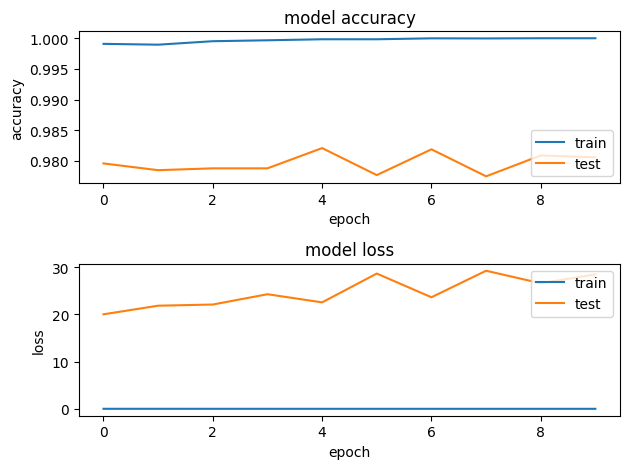

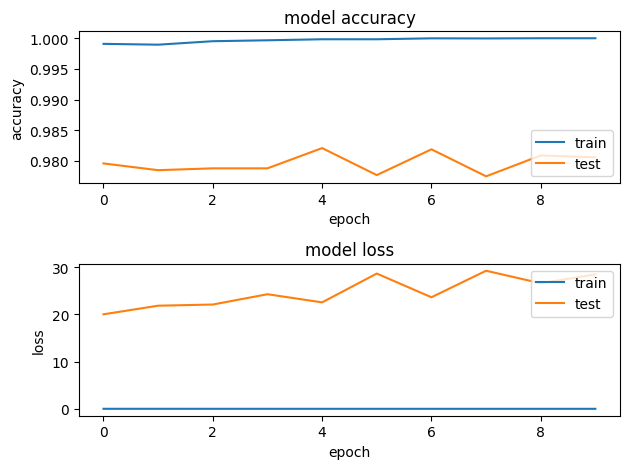

In [24]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig

Exercise 4: Run model 1 and model 2. For model 2, you will need to specify an additional convolutional layer after the first that is twice a large. You will also specify a dropout layer after the pooling layer. Which of these two models performs better?

We are creating an additional layer

In [13]:
#model 2
model_2 = Sequential()
model_2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_2.add(Conv2D(64, (3, 3), activation = 'relu'))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Dropout(.1))
model_2.add(Flatten())
model_2.add(Dense(100, activation='relu'))
model_2.add(Dense(num_category, activation='softmax'))

In [14]:
#compile model
model_2.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
#fit the model
batch_size = 64
num_epoch = 3
model_log_2 = model_2.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/3
938/938 [==============================] - 38s 40ms/step - loss: 0.0178 - accuracy: 0.9944 - val_loss: 6.6656 - val_accuracy: 0.9901
Epoch 2/3
938/938 [==============================] - 40s 43ms/step - loss: 0.0129 - accuracy: 0.9963 - val_loss: 8.6736 - val_accuracy: 0.9888
Epoch 3/3
938/938 [==============================] - 44s 46ms/step - loss: 0.0091 - accuracy: 0.9971 - val_loss: 8.1431 - val_accuracy: 0.9906


In [21]:
score_2 = model_2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score_2[0]) 
print('Test accuracy:', score_2[1])

Test loss: 8.143082618713379
Test accuracy: 0.9905999898910522


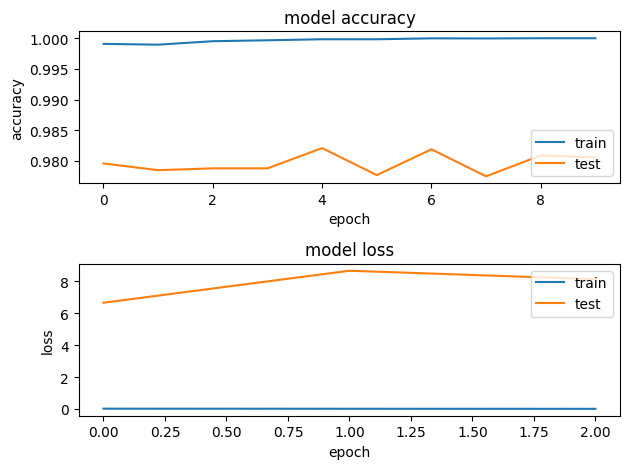

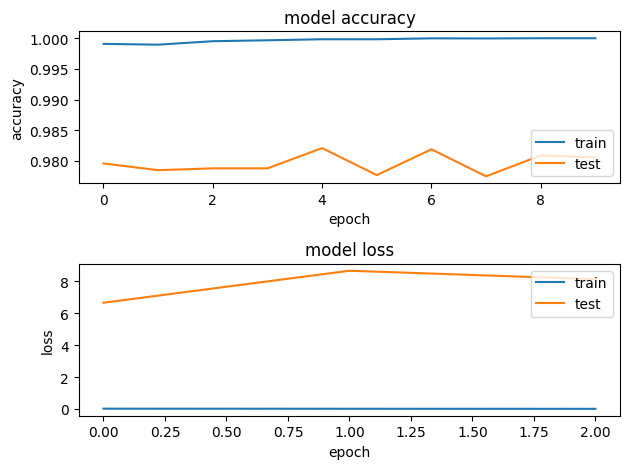

In [25]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log_2.history['loss'])
plt.plot(model_log_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig

Exercise 5: After finding the best out of the two models, add an optimiser and report the results. Does changing the learning rate within the optimiser affect the outcome?

In [32]:
#compile model
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['AUC'])

In [33]:
#fit the model
batch_size = 64
num_epoch = 3
model_log_2 = model_2.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/3
938/938 [==============================] - 39s 41ms/step - loss: 0.0105 - auc: 0.9999 - val_loss: 10.6466 - val_auc: 0.9942
Epoch 2/3
938/938 [==============================] - 40s 43ms/step - loss: 0.0073 - auc: 0.9999 - val_loss: 12.4181 - val_auc: 0.9926
Epoch 3/3
938/938 [==============================] - 41s 44ms/step - loss: 0.0065 - auc: 0.9999 - val_loss: 16.6015 - val_auc: 0.9931


In [34]:
score_2 = model_2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score_2[0]) 
print('Test accuracy:', score_2[1])

Test loss: 16.601470947265625
Test accuracy: 0.9930552244186401


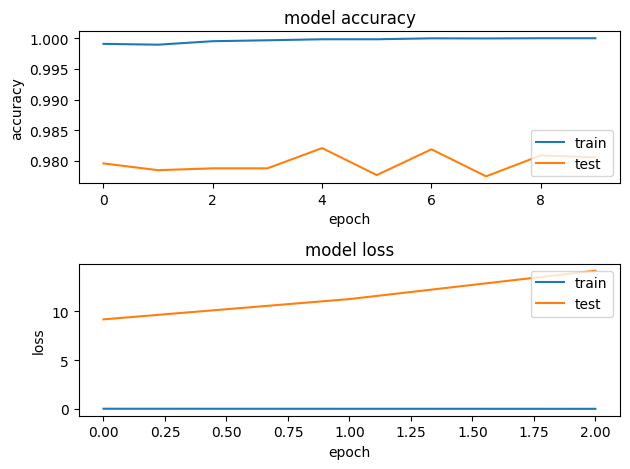

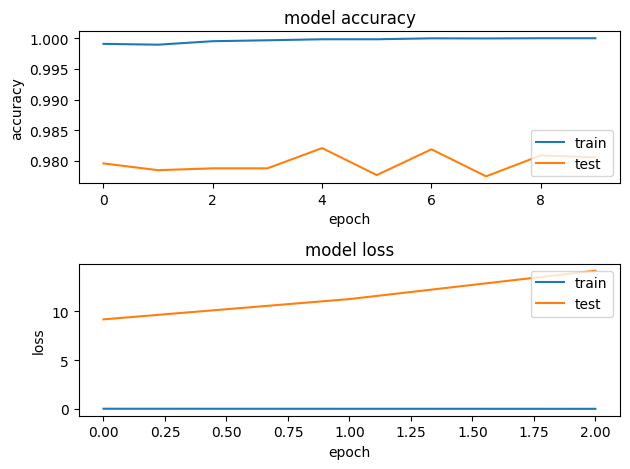

In [29]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log_2.history['loss'])
plt.plot(model_log_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig